# Project 7: Communicate Data Findings (2017 Ford Gobike Dataset)
## by Lamia Alshawi

## Investigation Overview

> I'm interested in figuring out when are most trips taken and how trip duration is dependent on other features like user type. Sample questions: when are most trips taken in terms of time of day or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This dataset includes: 
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_month'] = df['start_time'].dt.month
df['start_hour'] = df['start_time'].dt.hour
weekday={0:'Mon', 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
df['start_day'] = df['start_time'].dt.weekday.map(weekday)

## Subscribers vs. Customer Usage in Hours of Day

> Subscriber usage is mostly in the moring and evening the could be due to people who work in the morning and getting off work in the evening. Customers tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

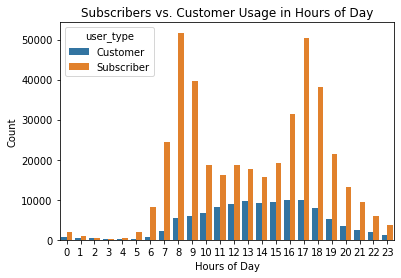

In [4]:
sb.countplot(data=df, x='start_hour', hue='user_type');
plt.title('Subscribers vs. Customer Usage in Hours of Day')
plt.xlabel('Hours of Day');
plt.ylabel('Count');

## Trip Duration on Weekdays for Each User Type

> We can observe that the customers tend to take rides mostly on weekends and their rides lasts around 50-60 mins. While subscribers take thier rides mostly on weekdays and their rides usually lasts about 5-10 mins. Customers rent the bike for leisure to look around the cities and subscribers the have a subscription because the use it for work commute rather than leisure.



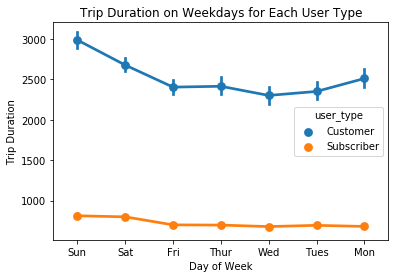

In [5]:
sb.pointplot(data=df, x='start_day', y='duration_sec', hue='user_type');
plt.title('Trip Duration on Weekdays for Each User Type')
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration');

## Monthly Trip Duration for Each User Type

> We can conclude that the user-type definitaly does have an impact on trip duration for instance the Customers rent out the bikes for longer trips unlike subscribers.

Text(-8.700000000000003, 0.5, 'Duration in Seconds')

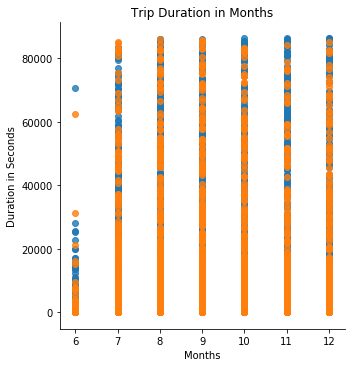

In [18]:
sb.lmplot( x="start_month", y="duration_sec", data=df, fit_reg=False, hue='user_type', legend=False)
plt.title('Trip Duration in Months')
plt.xlabel('Months')
plt.ylabel('Duration in Seconds')